In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('Coupen.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
#identifying columns
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [7]:
#shape of data
data.shape

(12684, 26)

In [8]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner', nan], dtype=object)

In [11]:
data['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [12]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

# Visualisatons

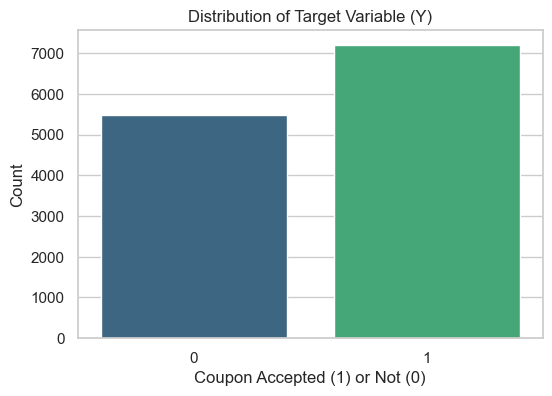

(        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
 count  12684.000000  12684.000000           12684.0       12684.000000   
 mean      63.301798      0.414144               1.0           0.561495   
 std       19.154486      0.492593               0.0           0.496224   
 min       30.000000      0.000000               1.0           0.000000   
 25%       55.000000      0.000000               1.0           0.000000   
 50%       80.000000      0.000000               1.0           1.000000   
 75%       80.000000      1.000000               1.0           1.000000   
 max       80.000000      1.000000               1.0           1.000000   
 
        toCoupon_GEQ25min  direction_same  direction_opp             Y  
 count       12684.000000    12684.000000   12684.000000  12684.000000  
 mean            0.119126        0.214759       0.785241      0.568433  
 std             0.323950        0.410671       0.410671      0.495314  
 min             0.000000      

In [13]:
# Set the visual style
sns.set(style="whitegrid")
# Summary statistics of numerical columns
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Y)')
plt.xlabel('Coupon Accepted (1) or Not (0)')
plt.ylabel('Count')
plt.show()

summary_stats, missing_values

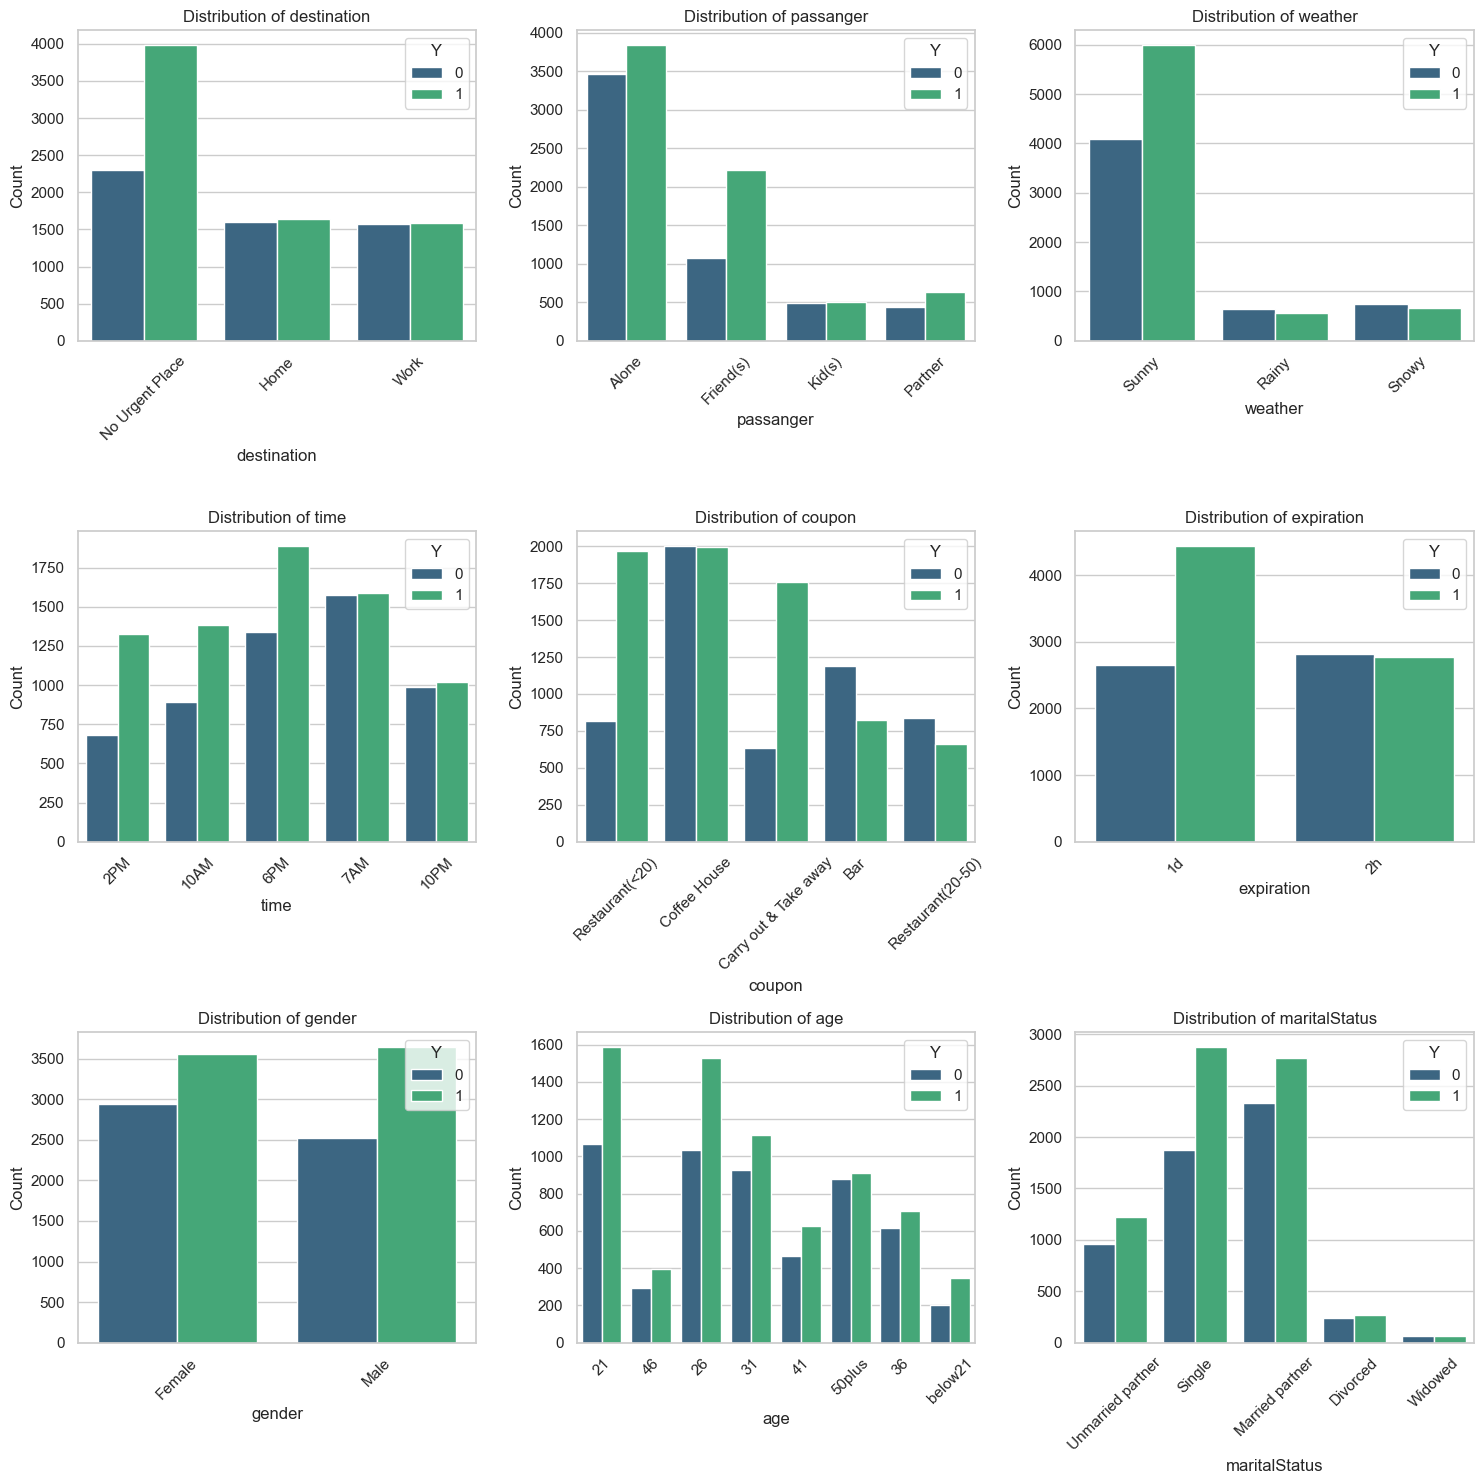

In [14]:
categorical_features = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=feature, hue='Y', palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
#filter missing value columns
missing_val_col=data.columns[data.isnull().any()]
missing_val_col

Index(['destination', 'passanger', 'expiration', 'maritalStatus', 'car', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

# preprocessing

In [16]:
# Fill missing values for columns with few missing values using the mode
for column in ['destination', 'passanger', 'expiration', 'maritalStatus']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [17]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [18]:
# Drop the 'car' column due to a high number of missing values
data.drop(columns=['car'], inplace=True)

In [19]:
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [20]:
missing_values_after = data.isnull().sum()

In [21]:
print("Missing values after handling:")
print(missing_values_after[missing_values_after > 0])

Missing values after handling:
Series([], dtype: int64)


In [22]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# outiers

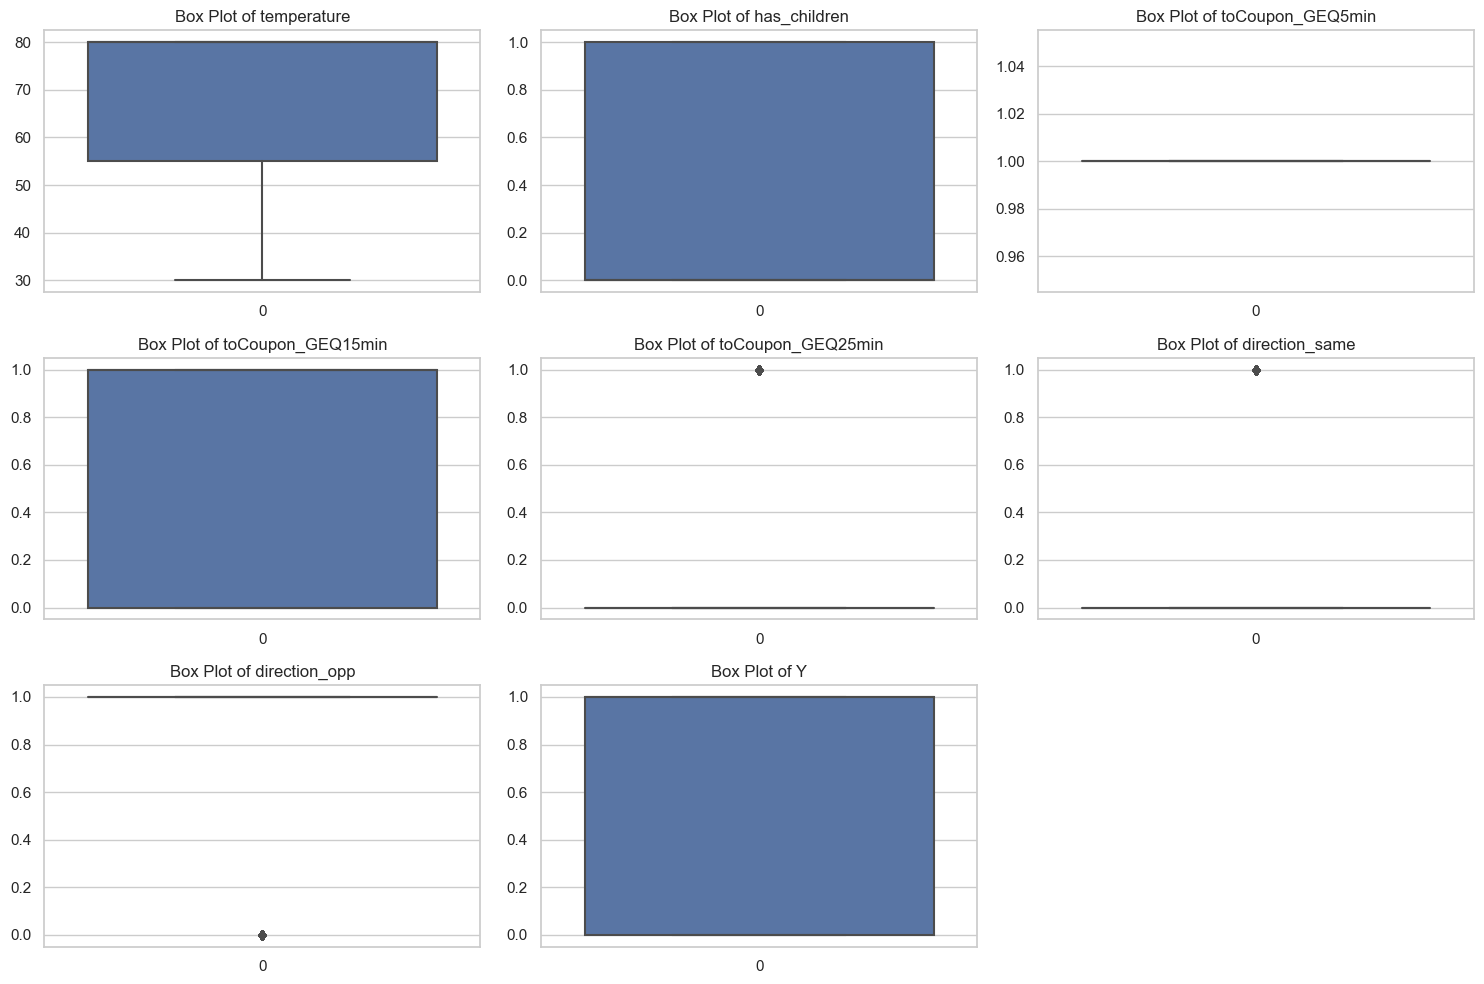

In [23]:
numeric_columns = data.select_dtypes(include=['number']).columns
# Plotting box plots for numeric columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
# Define features and target
X = data.drop('Y', axis=1)
y = data['Y']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Drop first to avoid multicollinearity
])

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    # Create a pipeline with preprocessing and model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
   # Convert sparse matrices to dense arrays if necessary
if hasattr(X_train, 'toarray'):
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    
    # Evaluate model
    model_performance[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Display model performance
for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")

# Hyperparameter tuning for Random Forest as an example
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', RandomForestClassifier())]),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest parameters found for Random Forest:")
print(best_params)
print(f"Best cross-validation accuracy: {best_score:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
